In [1]:
%matplotlib inline
import sys
sys.path.append("..")
from d2l import torch as d2l
import math
import torch
import numpy as np
import time

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
#@save
class Timer:
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        self.tik = time.time()
    
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        return sum(self.times) / len(self.times)

    def sum(self):
        return sum(self.times)

    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
print(f'{timer.stop():.5f} sec')

0.10871 sec


In [5]:
timer.start()
e = a + b
print(f'{timer.stop():.5f} sec')

0.00100 sec


In [6]:
def normal(x, mu, sigma):
    p = 1/math.sqrt(2*math.pi)/sigma
    return p*np.exp(- (x-mu)**2/2.0/sigma**2)

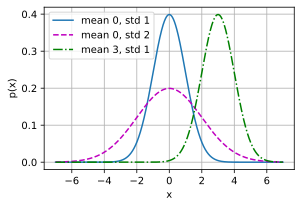

In [7]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5,3), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])